In [2]:
import matplotlib.pyplot as plt
import timeit
import numpy as np
import random

%matplotlib inline

In [3]:
!
!echo $LD_LIBRARY_PATH

In [4]:
def moving_average_(x, y):
    bin_centers = []
    bin_avg = []

    items = []
    last_x = x[0]
    for i, item in enumerate(y):        
        if last_x == x[i]:
            items.append(item)
        else:
            bin_avg.append(np.mean(items))
            bin_centers.append(last_x)
            last_x = x[i]
            items = [item]

    bin_avg.append(np.mean(items))
    bin_centers.append(x[-1])

    # smooth res 
    smooth_k = 0.3
    for i in range(1, len(bin_centers)-1):
        bin_avg[i] = (bin_avg[i-1] + bin_avg[i] + bin_avg[i+1]) / 3 * smooth_k + bin_avg[i] * (1- smooth_k)

    return bin_centers, bin_avg


def draw_data_and_average(x, y, colour='b', label='', linestyle='solid'):
    #plot the moving average
    # bins, average = moving_average(x, y, step_size=find_min_diff(x)/10, bin_size=find_min_diff(x))
    bins, average = moving_average_(x, y)
    
    # plt.scatter(x, y, colour, alpha=0.4, linewidths=0.5, label=(label+'_data'))
    plt.scatter(x, y, color=colour, alpha=0.4, label=label, linestyle=linestyle, marker='o')
    plt.plot(bins, average, colour, ms=1, linestyle=linestyle)
    plt.legend()


([100, 200, 300, 400, 600, 700, 800], [-0.48391303442686995, -0.9128347382036595, -1.1052301317086275, -0.8866122849939463, 0.07646715290789384, 0.6648011086435608, 0.8052956557919233])


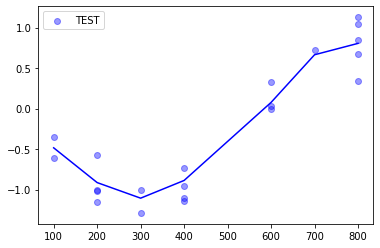

In [5]:
x = [100, 100, 200, 200, 200, 200, 300, 300, 400, 400, 400, 400, 600, 600, 600, 700, 800, 800, 800, 800, 800]
noise = np.random.normal(scale=0.3,size=len(x))
y = np.sin(x) + noise


print(moving_average_(x, y))
draw_data_and_average(x, y, 'b', 'TEST')

In [6]:
import time 

# def timeit(func, rep=100) -> list:
    # res = []
    # for i in range(rep):
        # t = time.time()
        # func()
        # res.append(time.time() - t)
    # 
    # return res

def timeit(func) -> list:
    t = time.time()
    func()
    return time.time() - t
    

In [7]:
## All-to-all shortest paths 

In [8]:
!export LD_LIBRARY_PATH=./:$LD_LIBRARY_PATH
!echo $LD_LIBRARY_PATH

In [9]:
import graph_python

ModuleNotFoundError: No module named 'graph_python'

In [ ]:

import random
import math
from graph_python import PyGraphGenerator, Dijkstra, BellmanFord, FloydWarshall, Johnson, Seidel


In [0]:
algos = {'FloydWarshall': FloydWarshall, 'Johnson': Johnson, 'Seidel': Seidel}

time_thin = {title:[] for title in algos}
time_dense = {title:[] for title in algos}

sizes = []

for n in range(10, 1111, 100):  # Graph sizes
    print(n)
    for _ in range(15):  # repetition 
        sizes.append(n)
        graph_thin = PyGraph(n)
        num = random.randint(n - 1, int(n*math.sqrt(n)))
        PyGraphGenerator.build_by_number(graph_thin, num)
        
        for title in algos:
            time_thin[title].append(timeit(lambda : algos[title](graph_thin)))

        graph_dense = PyGraph(n)
        num = random.randint(int(n*math.sqrt(n)), int(n*(n-1)/2))
        PyGraphGenerator.build_by_number(graph_dense, num)

        for title in algos:
            time_dense[title].append(timeit(lambda : algos[title](graph_dense)))

In [0]:
plt.figure(figsize=(30, 5))

plt.subplot(2, 1, 1)
for colour, title in zip(['c', 'm', 'r'], algos): 
    draw_data_and_average(sizes, time_thin[title], colour=colour, label=title, linestyle='dashed')
plt.xlabel('Graph size')
plt.ylabel('Time')
plt.grid(True)
plt.tight_layout()
plt.title('All-to-all Thin')
plt.labels()

plt.subplot(2, 1, 2)
for colour, title in zip(['c', 'm', 'r'], algos): 
    draw_data_and_average(sizes, time_dence[title], colour=colour, label=title, linestyle='dashed')
plt.xlabel('Graph size')
plt.ylabel('Time')
plt.grid(True)
plt.tight_layout()
plt.title('All-to-all Dence')
plt.labels()

plt.show()

In [0]:
## One-to-one


In [ ]:
import random 


# TODO: A*
algos = {'Dijkstra': Dijkstra, 'BellmanFord': BellmanFord}

time_thin = {title:[] for title in algos}
time_dense = {title:[] for title in algos}

sizes = []

for n in range(10, 1111, 100):  # Graph sizes
    print(n)
    for _ in range(15):  # repetition 
        sizes.append(n)
        src = random.randint(0, n-1)
        
        graph_thin = PyGraph(n)
        num = random.randint(n - 1, int(n*math.sqrt(n)))
        PyGraphGenerator.build_by_number(graph_thin, num)
        
        for title in algos:
            time_thin[title].append(timeit(lambda : algos[title](graph_thin, src)))  # TODO: scr - target 

        graph_dense = PyGraph(n)
        num = random.randint(int(n*math.sqrt(n)), int(n*(n-1)/2))
        PyGraphGenerator.build_by_number(graph_dense, num)

        for title in algos:
            time_dense[title].append(timeit(lambda : algos[title](graph_dense, src)))


In [ ]:
plt.figure(figsize=(30, 5))

plt.subplot(2, 1, 1)
for colour, title in zip(['c', 'm'], algos): 
    draw_data_and_average(sizes, time_thin[title], colour=colour, label=title, linestyle='dashed')
plt.xlabel('Graph size')
plt.ylabel('Time')
plt.grid(True)
plt.tight_layout()
plt.title('One-to-one Thin')
plt.labels()

plt.subplot(2, 1, 2)
for colour, title in zip(['c', 'm'], algos): 
    draw_data_and_average(sizes, time_dence[title], colour=colour, label=title, linestyle='dashed')
plt.xlabel('Graph size')
plt.ylabel('Time')
plt.grid(True)
plt.tight_layout()
plt.title('One-to-one Dence')
plt.labels()

plt.show()